# Analisi Dataset Dummy #

#### Libraries Import ####

In [3]:
import pandas as pd
from langdetect import detect
from IPython.display import display
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
from numpy import mean
from sklearn import metrics


import nltk
import os
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split





from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /home/paolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/paolo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/paolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/paolo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### DataSet Reading ####

In [51]:
path_to_dataset = os.path.join('Files_to_process', 'news_dataset.csv') # Generate the path where the dataset has to be

df = pd.read_csv("~/Files_to_process/news_dataset.csv", sep='___', engine='python')


In [52]:
df.shape

(3924, 4)

In [64]:
pd.set_option('display.max_rows', None)
df['news']

0       Così le varianti Covid sono entrate nell’osped...
1       La certezza è arrivata ieri pomeriggio: il vir...
2       Ancona, 8 febbraio 2021 - Casi positivi alla v...
3       Bologna, 4 febbraio 2021 - Scoperti casi di va...
4       Bologna, 6 febbraio 2021 - Sei casi di variant...
5       BOLOGNA. Le varianti del Covid sono ormai tra ...
6       Una situazione che viene definita «sotto contr...
7       Coronavirus: a Brescia un positivo su cinque è...
8       Ormai è quasi certo: la variante brasiliana, q...
9       Primi due casi di variante brasiliana accertat...
10      È arrivata in Italia anche la variante Sudafri...
22      E sono risultati tutti negativi al primo test ...
23      Primi contagiati in Italia. "Sono sei i casi d...
24      Sono saliti a 163 i pazienti in Toscana a cui ...
25      Proseguono le segnalazioni in Italia delle tre...
26      La metà dei casi di coronavirus accertati tra ...
27      "Cari concittadini, siamo costretti a malincuo...
28      Si spe

### Remove Duplicates ###

In [53]:
count = 0

for news in df['news']:
    count += 1

print(count)

3924


In [47]:
df.duplicated().sum()

498

In [54]:
df = df.drop_duplicates(keep="first")

In [55]:
count = 0

for news in df['news']:
    count += 1

print(count)

3426


#### Check language of the news ####

In [56]:

total_news = 0
en_news = 0
it_news = 0
foreign_news = 0


if(news):
    for news in df['news']:
        if(detect(news) == 'en'):
            en_news += 1
            total_news += 1
            print(news)
        if(detect(news) == 'it'):
            it_news += 1
            total_news += 1   
        if(detect(news) != 'en' and detect(news) != 'it'):
            foreign_news += 1
            total_news += 1



print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)



Simona Granati - Corbis via Getty Images ROME, ITALY - JANUARY 31: The entrance of the National Institute for Infectious Diseases Lazzaro Spallanzani in Rome, where two Chinese tourists who tested positive for Coronavirus 2019-nCov, are kept in isolation. on January 31, 2020 in Rome, Italy.


LangDetectException: No features in text.

Keeping just the italian ones (approx. 99.9%)

In [14]:

for news in df['news']:
    if(detect(news) == 'en' or detect(news) != 'it'):
        df = df.drop((df.index[df["news"]== news].tolist()))
 
total_news = 0
en_news = 0
it_news = 0
foreign_news = 0

for news in df['news']:
    if(detect(news) == 'en'):
        en_news += 1
        total_news += 1
    if(detect(news) == 'it'):
        it_news += 1
        total_news += 1   
    if(detect(news) != 'en' and detect(news) != 'it'):
        foreign_news += 1
        total_news += 1


print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)

df.reset_index(drop=True, inplace=True)

LangDetectException: No features in text.

#### Check how the categories are distributed ####

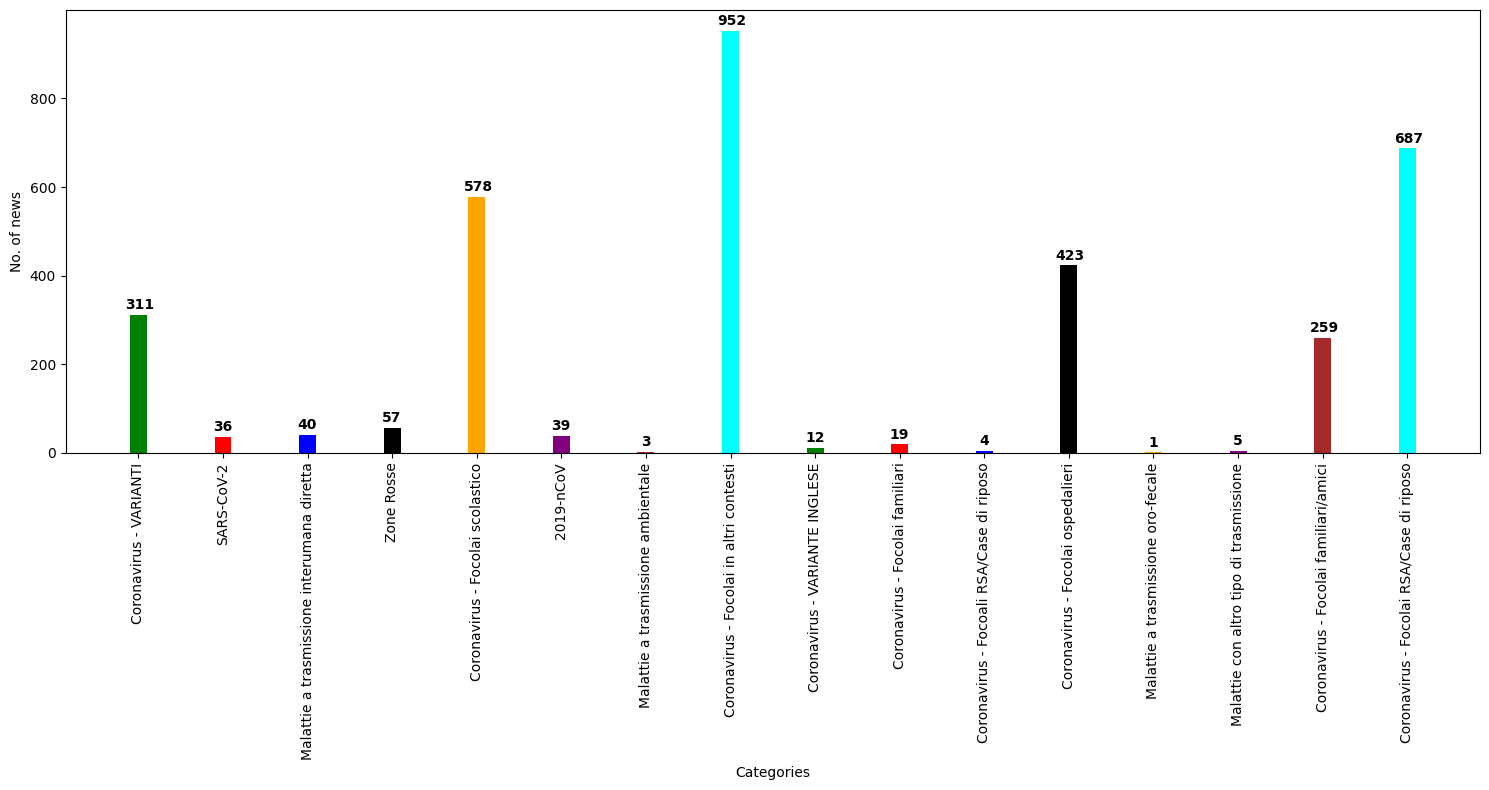

In [65]:
categories_list = (df['category'].unique())
counter = {}

for category in df['category']:
    if category not in counter:
        counter[category] = 0
    counter[category] += 1

hist_categories_x = list(counter.keys())
hist_categories_y = list(counter.values())

fig = plt.figure(figsize = (15, 8))

plt.bar(hist_categories_x, hist_categories_y, color =['green','red','blue','black','orange','purple', 'brown', 'cyan'], aa=True, width = 0.2)
plt.xlabel("Categories")
plt.ylabel("No. of news")
plt.xticks(rotation = 'vertical')
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,len(categories_list))]
xlabs=[i/2 for i in range(0,len(categories_list))]
for i, v in enumerate(hist_categories_y):
    if(v > 99 and v < 1000):
        plt.text(xlocs[i] - 1.155, v + 13, str(v), fontweight="bold")
    elif(v > 9 and v < 100):
        plt.text(xlocs[i] - 1.12, v + 13, str(v), fontweight="bold")
    elif(v > 0 and v < 10):
        plt.text(xlocs[i] - 1.06, v + 13, str(v), fontweight="bold")

plt.tight_layout()

plt.show()

### Categories Cleaning ###

#### Re-instance ####

In [72]:
row_count = 0
for category in df['category']:
    if category == 'Coronavirus - Focolai familiari':
        df.loc[row_count, 'category'] = 'Coronavirus - Focolai familiari/amici'
    row_count += 1

In [73]:
row_count = 0
for category in df['category']:
    if category == 'Coronavirus - Focoali RSA/Case di riposo':
        df.loc[row_count, 'category'] = 'Coronavirus - Focolai RSA/Case di riposo'
    row_count += 1

In [74]:
row_count = 0
for category in df['category']:
    if category == 'Coronavirus - VARIANTE INGLESE':
        df.loc[row_count, 'category'] = 'Coronavirus - VARIANTI'
    row_count += 1

#### Drop of the not useful categories according to the ISS ####

In [75]:
df.drop(df[df.category == 'Zone Rosse'].index, inplace=True)
df.drop(df[df.category == 'Malattie a trasmissione interumana diretta'].index, inplace=True)
df.drop(df[df.category == '2019-nCoV'].index, inplace=True)
df.drop(df[df.category == 'SARS-CoV-2'].index, inplace=True)
df.drop(df[df.category == 'Malattie con altro tipo di trasmissione'].index, inplace=True)
df.drop(df[df.category == 'Malattie a trasmissione ambientale'].index, inplace=True)
df.drop(df[df.category == 'Malattie a trasmissione oro-fecale'].index, inplace=True)

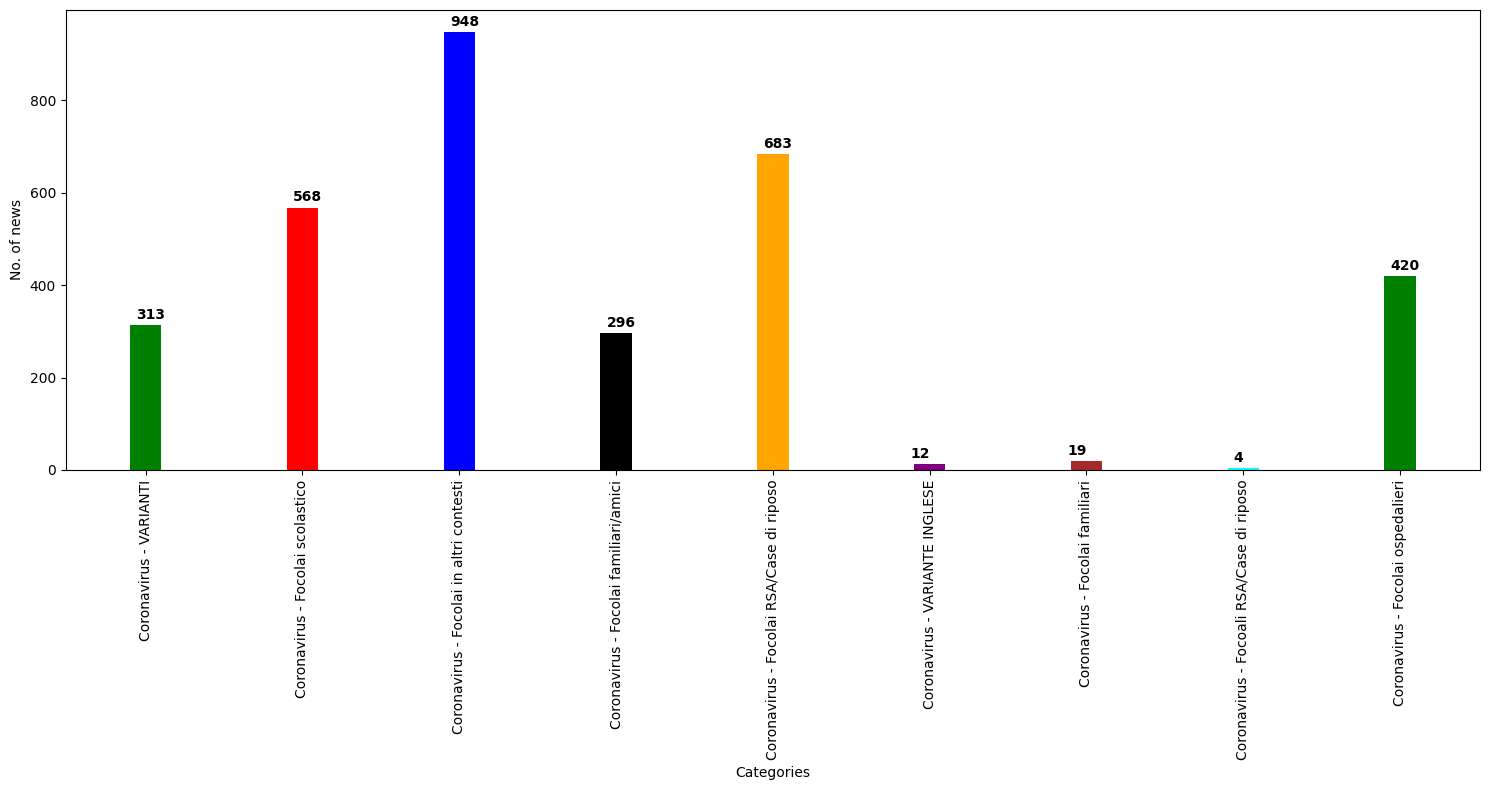

In [76]:
categories_list = (df['category'].unique())
counter = {}

for category in df['category']:
    if category not in counter:
        counter[category] = 0
    counter[category] += 1

hist_categories_x = list(counter.keys())
hist_categories_y = list(counter.values())

fig = plt.figure(figsize = (15, 8))

plt.bar(hist_categories_x, hist_categories_y, color =['green','red','blue','black','orange','purple', 'brown', 'cyan'], aa=True, width = 0.2)
plt.xlabel("Categories")
plt.ylabel("No. of news")
plt.xticks(rotation = 'vertical')
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,len(categories_list))]
xlabs=[i/2 for i in range(0,len(categories_list))]
for i, v in enumerate(hist_categories_y):
    if(v > 99 and v < 1000):
        plt.text(xlocs[i] - 1.06, v + 13, str(v), fontweight="bold")
    elif(v > 9 and v < 100):
        plt.text(xlocs[i] - 1.12, v + 13, str(v), fontweight="bold")
    elif(v > 0 and v < 10):
        plt.text(xlocs[i] - 1.06, v + 13, str(v), fontweight="bold")

plt.tight_layout()

plt.show()

In [77]:
df.shape

(3263, 4)

### Text Cleaning ###

In [78]:
df['category_id'] = df['category'].factorize()[0]
for element1, element2 in zip(df['category'].unique(), df['category_id'].unique()):
    print(element1 , '-->' , element2)

Coronavirus - VARIANTI --> 0
Coronavirus - Focolai scolastico --> 1
Coronavirus - Focolai in altri contesti --> 2
Coronavirus - Focolai familiari/amici --> 3
Coronavirus - Focolai RSA/Case di riposo --> 4
Coronavirus - VARIANTE INGLESE --> 5
Coronavirus - Focolai familiari --> 6
Coronavirus - Focoali RSA/Case di riposo --> 7
Coronavirus - Focolai ospedalieri --> 8


In [79]:
{k: v for k, v in sorted(counter.items(), reverse=True, key=lambda item: item[1])}

{'Coronavirus - Focolai in altri contesti': 948,
 'Coronavirus - Focolai RSA/Case di riposo': 683,
 'Coronavirus - Focolai scolastico': 568,
 'Coronavirus - Focolai ospedalieri': 420,
 'Coronavirus - VARIANTI': 313,
 'Coronavirus - Focolai familiari/amici': 296,
 'Coronavirus - Focolai familiari': 19,
 'Coronavirus - VARIANTE INGLESE': 12,
 'Coronavirus - Focoali RSA/Case di riposo': 4}

In [80]:
pd.set_option('display.max_colwidth', None)
df.iloc[233, 2:3]

news    Il Covid torna a mandare in apprensione il calcio italiano, l’annuncio circa la positività al Coronavirus gela i tifosi. È un ex calciatore a rivelare gli ultimi rumors, sulle indiscrezioni legate al problema Covid in Nazionale. Il gruppo squadra sarebbe colpito da un vero e proprio focolaio.
Name: 386, dtype: object

In [20]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', str(text))
  
df['news'] = df['news'].apply(remove_tags)

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
  
df['news'] = df['news'].apply(special_char)

def convert_lower(text):
   return text.lower()

df['news'] = df['news'].apply(convert_lower)

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
  
df['news'] = df['news'].apply(remove_stopwords)


def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

df['news'] = df['news'].apply(lemmatize_word)


In [21]:
df.iloc[233, 2:3]

news    coronavirus la variante inglese è arrivata pisa potrebbe essere arrivata pisa la cosiddetta variante inglese del covid 19 la notizia è riportata dai quotidiani locali anche se la conferma deve arrivare dalle analisi di laboratorio che verranno eseguite ospedale cisanello nei prossimi giorni
Name: 356, dtype: object

### Learning ###

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df['news'])
y = np.array(df['category_id'])
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (3245, 15933)
y.shape =  (3245,)


##### Define the k "best" for CV #####

Ideal: 0.805
> folds=2, accuracy=0.777 (0.774,0.779)
> folds=3, accuracy=0.786 (0.775,0.806)
> folds=4, accuracy=0.796 (0.788,0.803)
> folds=5, accuracy=0.792 (0.767,0.818)
> folds=6, accuracy=0.795 (0.776,0.830)
> folds=7, accuracy=0.798 (0.774,0.825)
> folds=8, accuracy=0.798 (0.770,0.833)
> folds=9, accuracy=0.795 (0.762,0.828)
> folds=10, accuracy=0.798 (0.759,0.846)
> folds=11, accuracy=0.798 (0.749,0.837)
> folds=12, accuracy=0.798 (0.759,0.856)
> folds=13, accuracy=0.798 (0.751,0.844)
> folds=14, accuracy=0.799 (0.740,0.836)
> folds=15, accuracy=0.798 (0.750,0.848)


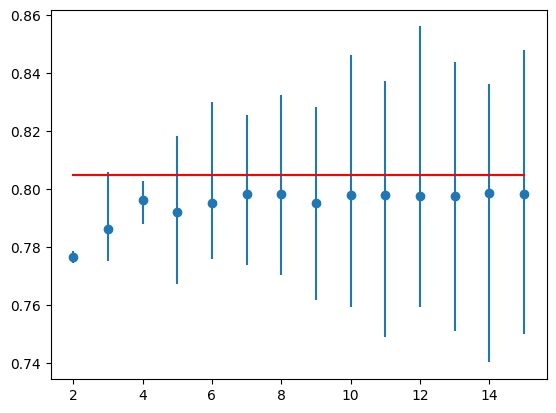

In [ ]:
model1 = LogisticRegression(max_iter=400)
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	
	# evaluate the model
	scores = cross_val_score(model1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,16)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

#### Split and Folds ####

In [34]:
folds = KFold(n_splits = 4, shuffle = True)
y_bin = label_binarize(y, classes=range(len(categories_list)))
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size = 0.30, random_state = 9)


#### Useful Functions For Evaluation ####

In [33]:
def evaluate(target, prediction):

    accuracy = round(metrics.accuracy_score(target, prediction) * 100, 2)
    precision = round(metrics.precision_score(target, prediction, average='micro') * 100, 2)
    recall = round(metrics.recall_score(target, prediction, average='micro') * 100, 2)
    f1_score = round(metrics.f1_score(target ,prediction, average='micro') * 100, 2)

    confusion_matrix = metrics.confusion_matrix(target.argmax(axis=1), prediction.argmax(axis=1))

    print('Confusion Matrix\n')

    for row in range(len(confusion_matrix)):
        print(categories_list[row]+"\t"+str(confusion_matrix[row]))

    print('\n')

    print('\nClassification Report\n')
    print(classification_report(target, prediction, target_names=categories_list))
    print('Accuracy : ' ,accuracy)


In [29]:
def drawROC(score):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(categories_list)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(len(categories_list)):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve Class: ' + categories_list[i])
        plt.legend(loc="lower right")
        plt.show()



### Baseline (Logistic Regression) ####

In [27]:
mdl1 = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=400)
clf_1 = OneVsRestClassifier(mdl1)

clf_1.fit(x_train, y_train)
y_pred = clf_1.predict(x_test)

evaluate(y_test, y_pred)

Confusion Matrix

Coronavirus - VARIANTI	[104   3   6   0   0   0]
Coronavirus - Focolai scolastico	[ 38 123  11   3   0   0]
Coronavirus - Focolai in altri contesti	[ 59   5 200   9   2   1]
Coronavirus - Focolai familiari/amici	[28  6 23 17  1  0]
Coronavirus - Focolai RSA/Case di riposo	[ 30   2   8   1 152   3]
Coronavirus - Focolai ospedalieri	[20  0 18  0  5 96]



Classification Report

                                          precision    recall  f1-score   support

                  Coronavirus - VARIANTI       0.90      0.79      0.84       113
        Coronavirus - Focolai scolastico       0.89      0.72      0.79       175
 Coronavirus - Focolai in altri contesti       0.72      0.72      0.72       276
   Coronavirus - Focolai familiari/amici       0.57      0.32      0.41        75
Coronavirus - Focolai RSA/Case di riposo       0.93      0.79      0.86       196
       Coronavirus - Focolai ospedalieri       0.96      0.73      0.83       139

                           

/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


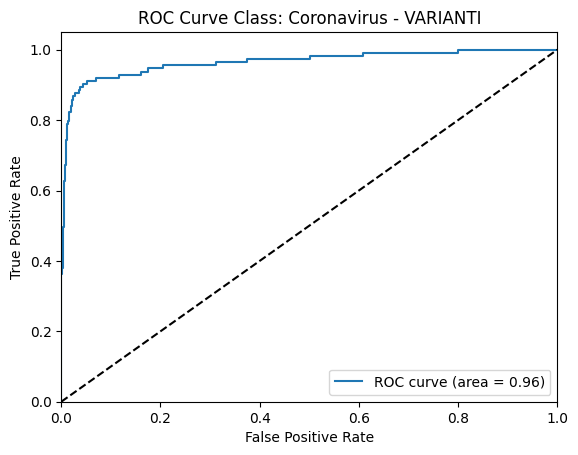

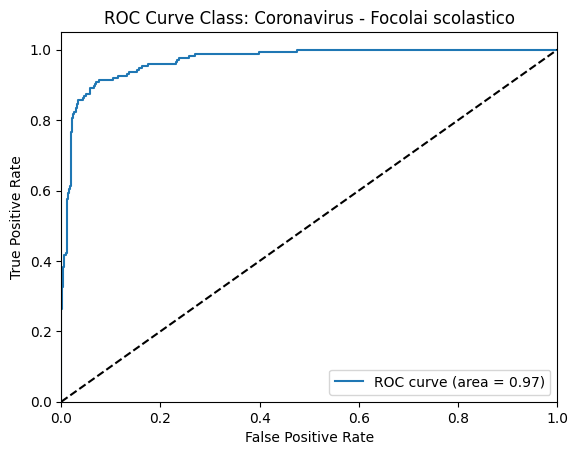

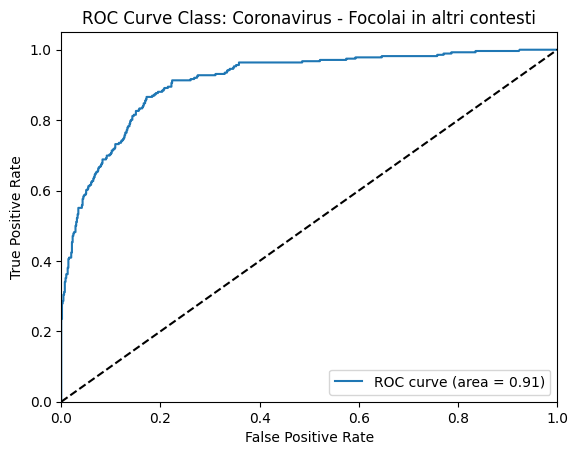

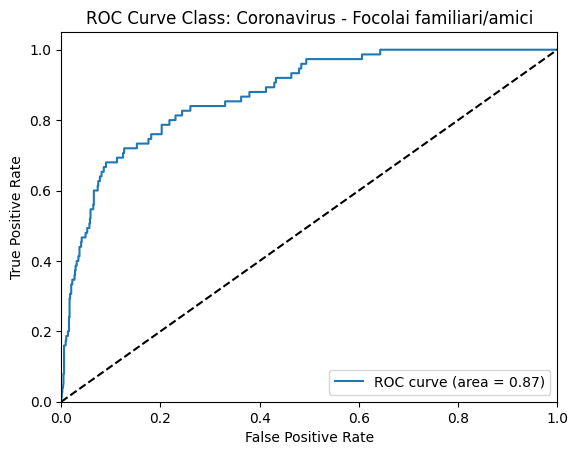

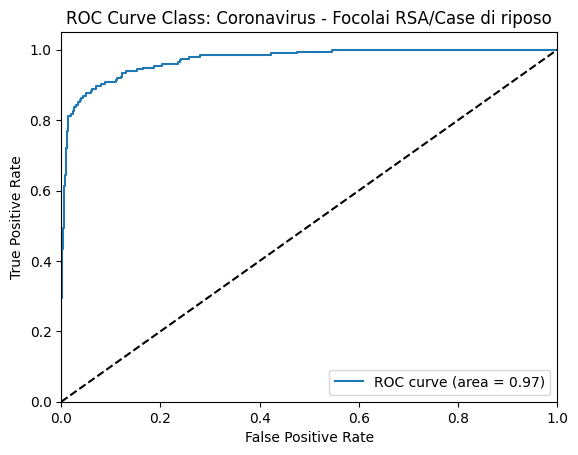

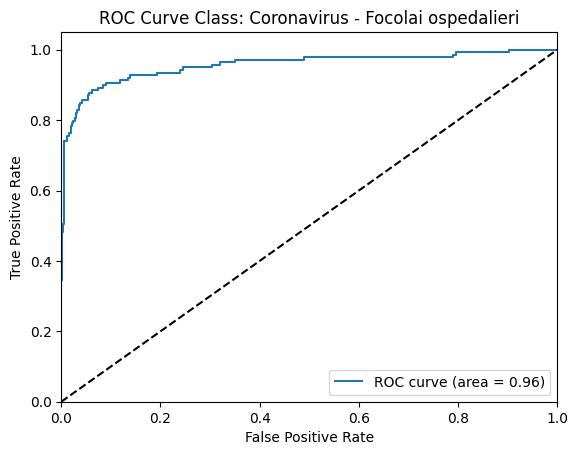

In [30]:
y_score_lr = clf_1.fit(x_train, y_train).decision_function(x_test)

drawROC(y_score_lr)

### Gradient Boosting ###

#### Tuning ####

In [35]:
scores_boost = []

r = [5, 15, 25, 50, 75,  100, 150, 200]
for k in r:
    score_boost = cross_val_score(estimator=GradientBoostingClassifier(n_estimators=k), X = x, y= y, cv=folds, scoring='accuracy')
    scores_boost.append(score_boost.mean())

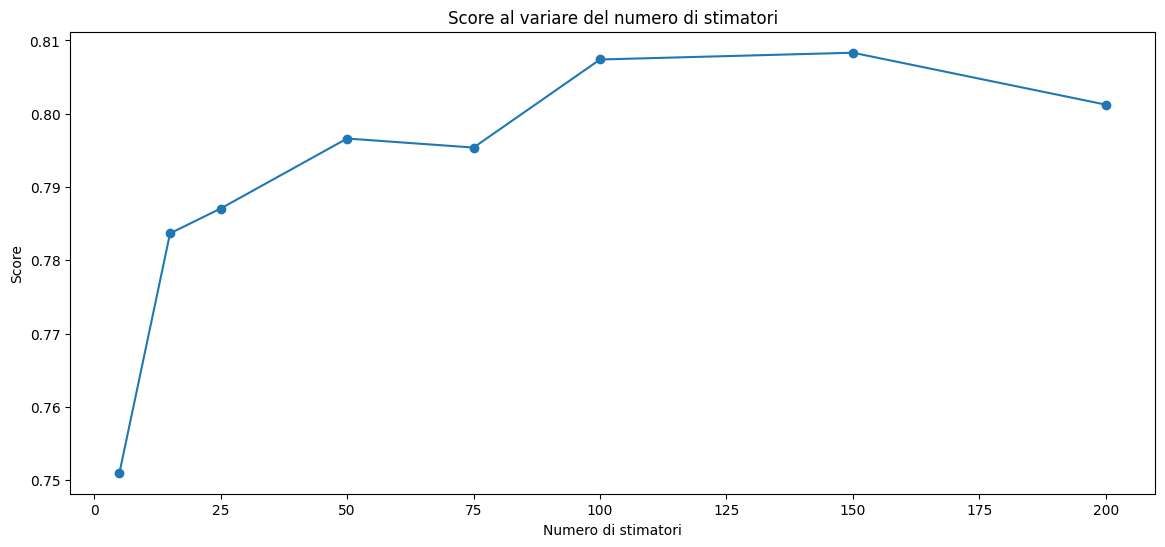

In [36]:
fig = plt.figure(figsize=(14,6))
ax = fig.gca()
plt.plot(r, scores_boost, marker='o') 
plt.xlabel(r'Numero di stimatori')
plt.ylabel('Score')
plt.title(r'Score al variare del numero di stimatori')
plt.show()

In [37]:
gbc = GradientBoostingClassifier(n_estimators=125)
parameters = {
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,1]
}

In [40]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=folds)
cv.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(n_estimators=125),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7]})

In [41]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [42]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3}


0.773 + or -0.016 for the {'learning_rate': 0.01, 'max_depth': 3}
0.78 + or -0.008 for the {'learning_rate': 0.01, 'max_depth': 5}
0.776 + or -0.01 for the {'learning_rate': 0.01, 'max_depth': 7}
0.802 + or -0.01 for the {'learning_rate': 0.1, 'max_depth': 3}
0.801 + or -0.013 for the {'learning_rate': 0.1, 'max_depth': 5}
0.791 + or -0.01 for the {'learning_rate': 0.1, 'max_depth': 7}
0.743 + or -0.012 for the {'learning_rate': 1, 'max_depth': 3}
0.765 + or -0.003 for the {'learning_rate': 1, 'max_depth': 5}
0.775 + or -0.015 for the {'learning_rate': 1, 'max_depth': 7}


#### Learning ####

In [48]:
mdl2 = GradientBoostingClassifier(n_estimators=125, learning_rate=0.1, max_depth=3)
clf_2 = OneVsRestClassifier(mdl2) 

clf_2.fit(x_train, y_train)
y_pred = clf_2.predict(x_test)

evaluate(y_test, y_pred)


Confusion Matrix

Coronavirus - VARIANTI	[108   2   1   2   0   0]
Coronavirus - Focolai scolastico	[ 53 118   2   1   1   0]
Coronavirus - Focolai in altri contesti	[108   9 153   4   1   1]
Coronavirus - Focolai familiari/amici	[45  7  9 13  1  0]
Coronavirus - Focolai RSA/Case di riposo	[ 25   2   2   2 163   2]
Coronavirus - Focolai ospedalieri	[ 32   0   2   0   5 100]



Classification Report

                                          precision    recall  f1-score   support

                  Coronavirus - VARIANTI       0.78      0.81      0.80       113
        Coronavirus - Focolai scolastico       0.84      0.73      0.78       175
 Coronavirus - Focolai in altri contesti       0.90      0.56      0.69       276
   Coronavirus - Focolai familiari/amici       0.44      0.20      0.28        75
Coronavirus - Focolai RSA/Case di riposo       0.93      0.86      0.89       196
       Coronavirus - Focolai ospedalieri       0.93      0.73      0.82       139

                     

/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


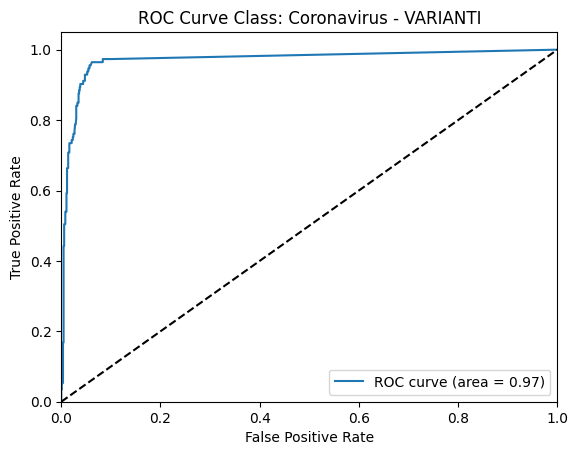

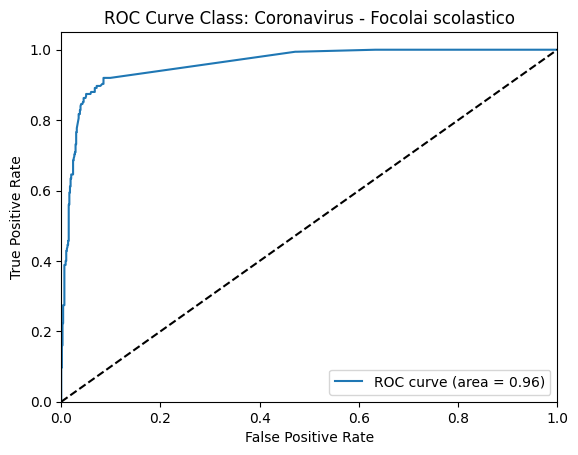

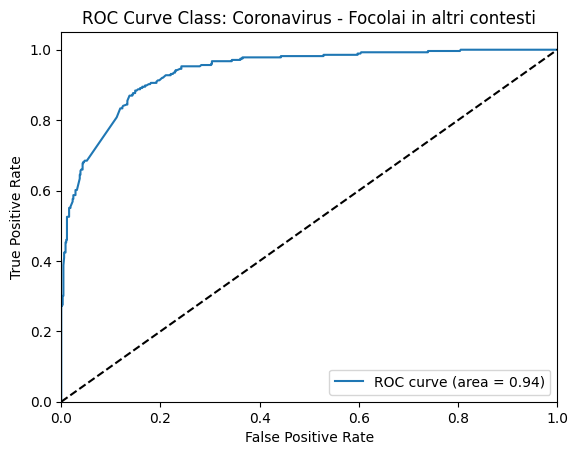

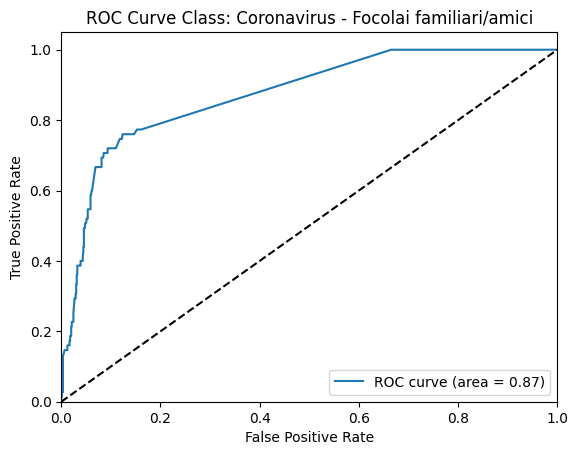

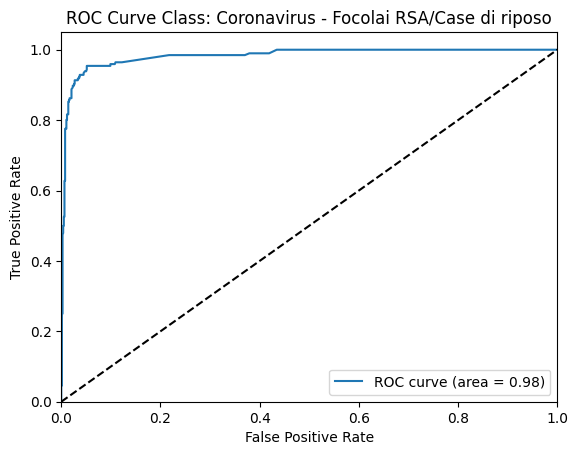

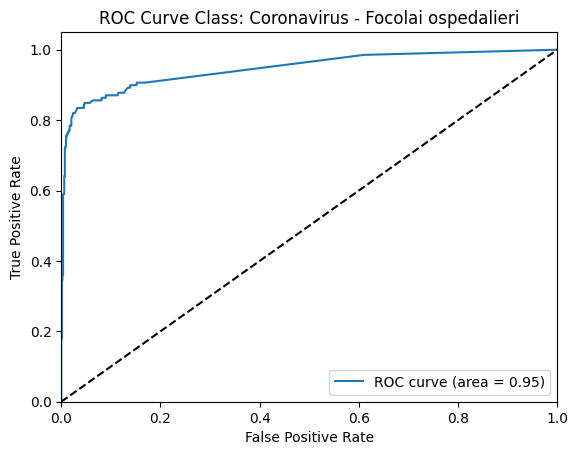

In [50]:
y_score_gb = clf_2.fit(x_train, y_train).decision_function(x_test)
drawROC(y_score_gb)

#### Multinomial Naive Bayes ####

#### Tuning ####

In [45]:
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=4, 
                                    n_repeats=3)

params_NB = {'alpha': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=MultinomialNB(), 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


gs_NB.fit(x,y)


Fitting 12 folds for each of 100 candidates, totalling 1200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=4, random_state=None),
             estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.336...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [47]:
gs_NB.best_params_

{'alpha': 0.2848035868435802}

#### Learning ####

In [49]:
mdl3 = MultinomialNB(alpha = 0.2848035868435802)
clf_3 = OneVsRestClassifier(mdl3) 

clf_3.fit(x_train, y_train)
y_pred = clf_3.predict(x_test)

evaluate(y_test, y_pred)


Confusion Matrix

Coronavirus - VARIANTI	[106   4   2   1   0   0]
Coronavirus - Focolai scolastico	[ 18 149   5   2   1   0]
Coronavirus - Focolai in altri contesti	[ 28  31 195   8  12   2]
Coronavirus - Focolai familiari/amici	[20 14 27 12  2  0]
Coronavirus - Focolai RSA/Case di riposo	[  9   2  10   4 170   1]
Coronavirus - Focolai ospedalieri	[ 7  0  5  0 33 94]



Classification Report

                                          precision    recall  f1-score   support

                  Coronavirus - VARIANTI       0.77      0.85      0.81       113
        Coronavirus - Focolai scolastico       0.74      0.85      0.79       175
 Coronavirus - Focolai in altri contesti       0.76      0.79      0.77       276
   Coronavirus - Focolai familiari/amici       0.36      0.51      0.42        75
Coronavirus - Focolai RSA/Case di riposo       0.70      0.92      0.80       196
       Coronavirus - Focolai ospedalieri       0.74      0.86      0.80       139

                           

/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


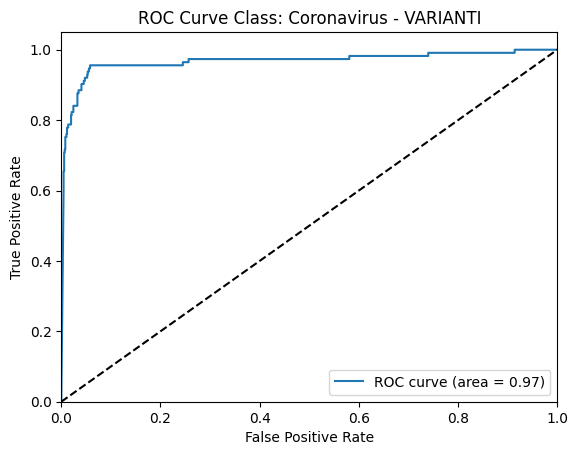

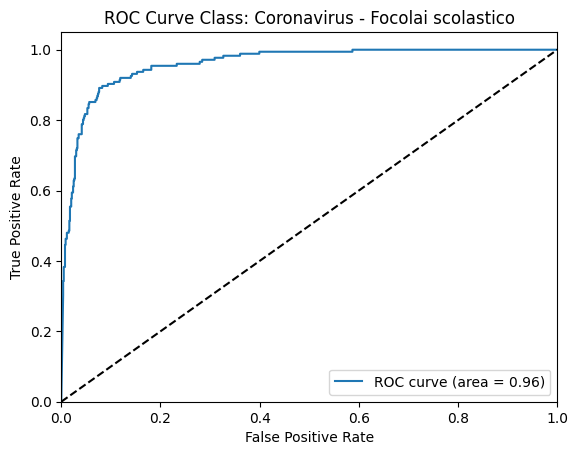

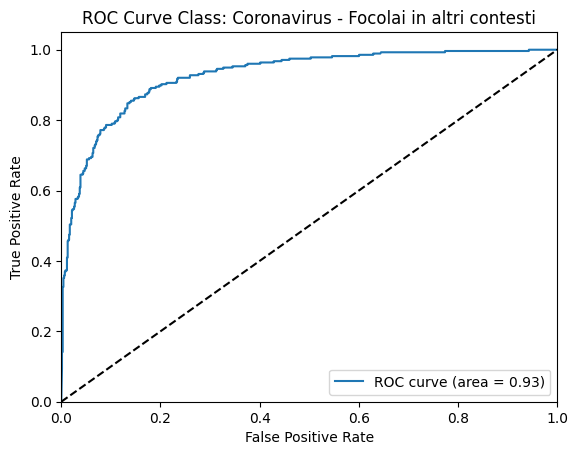

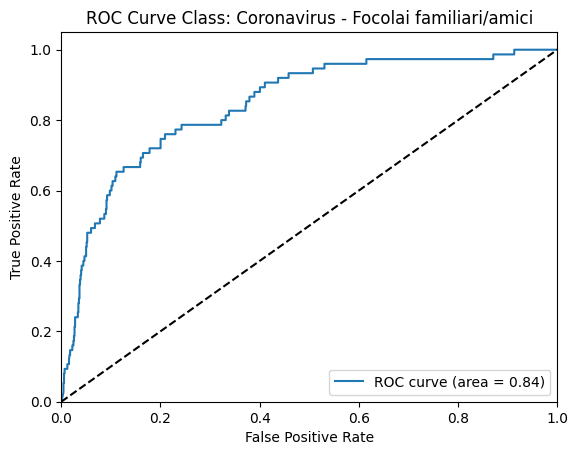

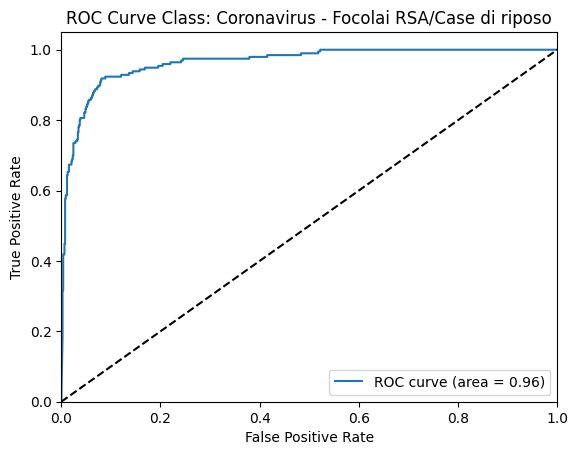

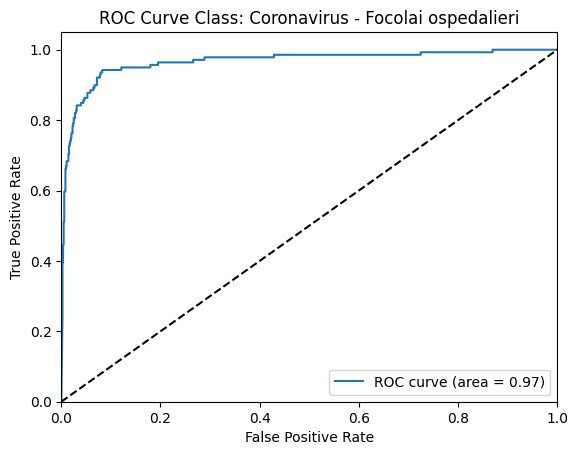

In [51]:

Y_gnb_score = clf_3.predict_proba(x_test)
drawROC(Y_gnb_score)
